In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname=font_path).get_name()
import statsmodels.api as sm
from math import *

In [2]:
weather = pd.read_csv("제주기상자료(월단위).csv", encoding="cp949")

In [ ]:
weather.head()

In [3]:
temp_1 = weather[weather['지점명']=='제주']
temp_1 = temp_1.drop(['지점','평균최고기온(°C)','평균최저기온(°C)','월합강수량(00~24h만)(mm)'],axis=1, inplace=False)
temp_1 = temp_1.reset_index(drop=False)

In [4]:
temp_1['sinx/6']= temp_1['index'].apply(lambda x: sin((x+1)*pi/6))
temp_1['cosx/6']= temp_1['index'].apply(lambda x: cos((x+1)*pi/6))
temp_1['sinx/3']= temp_1['index'].apply(lambda x: sin((x+1)*pi/3))
temp_1['cosx/3']= temp_1['index'].apply(lambda x: cos((x+1)*pi/3))

In [5]:
target1 = temp_1['평균기온(°C)']
x_data = temp_1[['sinx/6','cosx/6','cosx/3']]
x_data = sm.add_constant(x_data , has_constant = "add")

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
multi_model1 = sm.OLS(target1,x_data)
fitted_multi_model1 = multi_model1.fit()

In [7]:
y_pred1 =fitted_multi_model1.predict(x_data)

In [8]:
x_new = np.column_stack([ sin((42+1)*pi/6), cos((42+1)*pi/6) , cos((42+1)*pi/3) ])
x_new = sm.add_constant(x_new, has_constant= "add")

In [9]:
x_new

array([[ 1.       , -0.5      , -0.8660254,  0.5      ]])

In [10]:
ynewpred1 = fitted_multi_model1.predict(x_new)
ynewpred1

array([25.80244986])

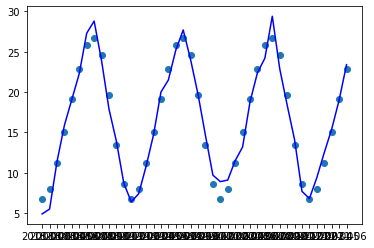

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(temp_1['일시'] ,y_pred1,'o')
ax.plot(temp_1['일시'], target1, 'b-')

In [12]:
fitted_multi_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               평균기온(°C)   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     437.1
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           1.73e-29
Time:                        20:02:23   Log-Likelihood:                -66.244
No. Observations:                  42   AIC:                             140.5
Df Residuals:                      38   BIC:                             147.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8175      0.192     87.739      0.000      16.429      17.206
sinx/6        -6.7113      0.271    -24.720      0.000      -7.261      -6.162
cosx/6        -7.1113      0.269    -26.414      0.000      -7.656      -6.566
cosx/3        -1.0585      0.270     -3.926      0.000      -1.604      -0.513
==============================================================================
Omnibus:                        0.144   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.349
Skew:                           0.065   Prob(JB):                        0.840
Kurtosis:                       2.573   Cond. No.                         1.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
temp_2 = weather[weather['지점명']=='서귀포']
temp_2 = temp_2.drop(['지점','평균최고기온(°C)','평균최저기온(°C)','월합강수량(00~24h만)(mm)'],axis=1, inplace=False)
temp_2 = temp_2.reset_index(drop=False)
temp_2['sinx/6']= temp_2['index'].apply(lambda x: sin((x+1)*pi/6))
temp_2['cosx/6']= temp_2['index'].apply(lambda x: cos((x+1)*pi/6))
temp_2['sinx/3']= temp_2['index'].apply(lambda x: sin((x+1)*pi/3))
temp_2['cosx/3']= temp_2['index'].apply(lambda x: cos((x+1)*pi/3))


target2 = temp_2['평균기온(°C)']

In [14]:
multi_model2 = sm.OLS(target2, x_data)
fitted_multi_model2 = multi_model2.fit()
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               평균기온(°C)   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     403.6
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           7.51e-29
Time:                        20:02:45   Log-Likelihood:                -63.832
No. Observations:                  42   AIC:                             135.7
Df Residuals:                      38   BIC:                             142.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9917      0.181     93.886      0.000      16.625      17.358
sinx/6        -6.1275      0.256    -23.903      0.000      -6.646      -5.609
cosx/6        -6.4168      0.254    -25.243      0.000      -6.931      -5.902
cosx/3        -0.9565      0.255     -3.757      0.001      -1.472      -0.441
==============================================================================
Omnibus:                        1.782   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.690
Skew:                          -0.409   Prob(JB):                        0.430
Kurtosis:                       2.455   Cond. No.                         1.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
ynewpred2 = fitted_multi_model2.predict(x_new)
ynewpred2

array([25.13429256])

In [16]:
y_pred2 =fitted_multi_model2.predict(x_data)

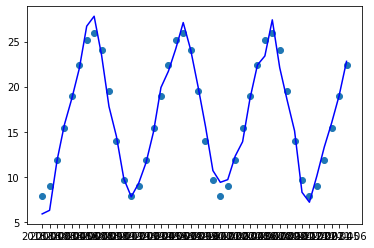

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(temp_2['일시'] ,y_pred2,'o')
ax.plot(temp_2['일시'], target2, 'b-')

In [18]:
temp_3 = weather[weather['지점명']=='고산']
temp_3 = temp_3.drop(['지점','평균최고기온(°C)','평균최저기온(°C)','월합강수량(00~24h만)(mm)'],axis=1, inplace=False)
temp_3 = temp_3.reset_index(drop=False)
temp_3['sinx/6']= temp_3['index'].apply(lambda x: sin((x+1)*pi/6))
temp_3['cosx/6']= temp_3['index'].apply(lambda x: cos((x+1)*pi/6))
temp_3['sinx/3']= temp_3['index'].apply(lambda x: sin((x+1)*pi/3))
temp_3['cosx/3']= temp_3['index'].apply(lambda x: cos((x+1)*pi/3))


target3 = temp_3['평균기온(°C)']

In [19]:
multi_model3 = sm.OLS(target3, x_data)
fitted_multi_model3 = multi_model3.fit()

fitted_multi_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               평균기온(°C)   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     447.6
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           1.12e-29
Time:                        20:03:02   Log-Likelihood:                -63.680
No. Observations:                  42   AIC:                             135.4
Df Residuals:                      38   BIC:                             142.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2360      0.180     90.036      0.000      15.871      16.601
sinx/6        -6.6943      0.255    -26.209      0.000      -7.211      -6.177
cosx/6        -6.4720      0.253    -25.553      0.000      -6.985      -5.959
cosx/3        -1.0365      0.254     -4.086      0.000      -1.550      -0.523
==============================================================================
Omnibus:                        1.723   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.155
Skew:                          -0.079   Prob(JB):                        0.561
Kurtosis:                       2.203   Cond. No.                         1.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
ynewpred3 = fitted_multi_model3.predict(x_new)
ynewpred3

array([24.66981087])

In [21]:
temp_4 = weather[weather['지점명']=='성산']
temp_4 = temp_4.drop(['지점','평균최고기온(°C)','평균최저기온(°C)','월합강수량(00~24h만)(mm)'],axis=1, inplace=False)
temp_4 = temp_4.reset_index(drop=False)
temp_4['sinx/6']= temp_4['index'].apply(lambda x: sin((x+1)*pi/6))
temp_4['cosx/6']= temp_4['index'].apply(lambda x: cos((x+1)*pi/6))
temp_4['sinx/3']= temp_4['index'].apply(lambda x: sin((x+1)*pi/3))
temp_4['cosx/3']= temp_4['index'].apply(lambda x: cos((x+1)*pi/3))


target4 = temp_4['평균기온(°C)']

In [22]:
multi_model4 = sm.OLS(target4, x_data)
fitted_multi_model4 = multi_model4.fit()
fitted_multi_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               평균기온(°C)   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     461.7
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           6.29e-30
Time:                        20:03:21   Log-Likelihood:                -64.644
No. Observations:                  42   AIC:                             137.3
Df Residuals:                      38   BIC:                             144.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0201      0.185     86.823      0.000      15.647      16.394
sinx/6        -6.6172      0.261    -25.319      0.000      -7.146      -6.088
cosx/6        -7.0504      0.259    -27.204      0.000      -7.575      -6.526
cosx/3        -1.1709      0.260     -4.511      0.000      -1.696      -0.645
==============================================================================
Omnibus:                        0.558   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.643
Skew:                          -0.244   Prob(JB):                        0.725
Kurtosis:                       2.640   Cond. No.                         1.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
ynewpred4 = fitted_multi_model4.predict(x_new)
ynewpred4

array([24.84907705])

In [ ]:
data_jeju = 